In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#read the Dataset sheet. The dataset will be called "data".
path = %pwd
# https://opendata.ecdc.europa.eu/covid19/casedistribution/csv
data = pd.read_csv("covid19_20200717.csv")
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,17/07/2020,17,7,2020,76,21,Afghanistan,AF,AFG,38041757.0,Asia,8.012248
1,16/07/2020,16,7,2020,254,49,Afghanistan,AF,AFG,38041757.0,Asia,8.301404
2,15/07/2020,15,7,2020,285,33,Afghanistan,AF,AFG,38041757.0,Asia,8.472269
3,14/07/2020,14,7,2020,4,2,Afghanistan,AF,AFG,38041757.0,Asia,8.456497
4,13/07/2020,13,7,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,9.158357


In [27]:
mask = data["geoId"]=="US"
data_us = data[mask].reset_index(drop=True)
#mask2 = data["deaths"] >= 100
#sorted(data2["deaths"], reverse=True)
data_us["c_cumul"] = 0
data_us["d_cumul"] = 0
data_us["c_ratio"] = 0
data_us["d_ratio"] = 0
data_us.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,c_cumul,d_cumul,c_ratio,d_ratio
0,17/07/2020,17,7,2020,76930,939,United_States_of_America,US,USA,329064917.0,America,254.157146,0,0,0,0
1,16/07/2020,16,7,2020,67717,953,United_States_of_America,US,USA,329064917.0,America,247.006277,0,0,0,0
2,15/07/2020,15,7,2020,68518,861,United_States_of_America,US,USA,329064917.0,America,242.244602,0,0,0,0
3,14/07/2020,14,7,2020,58114,400,United_States_of_America,US,USA,329064917.0,America,234.757326,0,0,0,0
4,13/07/2020,13,7,2020,57258,391,United_States_of_America,US,USA,329064917.0,America,229.725492,0,0,0,0


In [110]:
taille = len(data_us)
print("Nombre:", taille)
for i in range(taille - 2, -1, -1):
    data_us.loc[i, "c_cumul"] = data_us.loc[i, "cases"] + data_us.loc[i+1, "c_cumul"]
    data_us.loc[i, "d_cumul"] = data_us.loc[i, "deaths"] + data_us.loc[i+1, "d_cumul"]

for i in range(taille - 2, -1, -1):
    if data_us.loc[i, "cases"] > 0:   # deja initialise à 0
        data_us.loc[i, "c_ratio"] = data_us.loc[i, "cases"] / data_us.loc[i+1, "cases"]
    if data_us.loc[i+1, "deaths"] > 0:   # deja initialise à 0
        data_us.loc[i, "d_ratio"] = data_us.loc[i, "deaths"] / data_us.loc[i+1, "deaths"]

data_us.head(3)
data_us.tail(3)

Nombre: 200


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,c_cumul,d_cumul,c_ratio,d_ratio,new_cases,diff
199,31/12/2019,31,12,2019,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,0,0,0.0,0.0,0,0
198,01/01/2020,1,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,0,0,0.0,0.0,0,0
197,02/01/2020,2,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,0,0,0.0,0.0,0,0


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,c_cumul,d_cumul,c_ratio,d_ratio,new_cases,diff
2,15/07/2020,15,7,2020,68518,861,United_States_of_America,US,USA,329064917.0,America,242.244602,3431574,136466,1.179027,2.152500,68518,0
1,16/07/2020,16,7,2020,67717,953,United_States_of_America,US,USA,329064917.0,America,247.006277,3499291,137419,0.988310,1.106852,67717,0
0,17/07/2020,17,7,2020,76930,939,United_States_of_America,US,USA,329064917.0,America,254.157146,3576221,138358,1.136052,0.985310,76930,0


<Figure size 3600x2880 with 0 Axes>

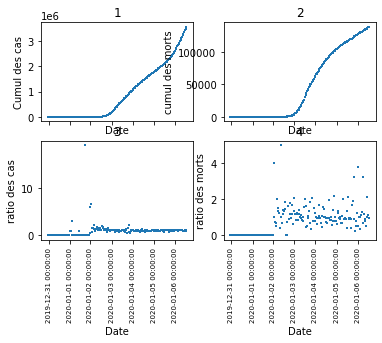

In [154]:
# Not needed if sorted date values
#maxX = data_us["Date"].tail(1)
#minX = data_us["Date"].head(1)

tab_X = [(0,0),(0,1),(1,0),(1,1)]
tab_Y = ["c_cumul","d_cumul","c_ratio","d_ratio"]
lab_Y = ["Cumul des cas", "cumul des morts", "ratio des cas", "ratio des morts"]
tit_Y = ["1", "2", "3", "4"]
_= plt.figure(figsize=(50,40))
fig, ax = plt.subplots(2,2, sharex=True)
for n in range(0,4,1): 
    _= ax[tab_X[n]].scatter(data_us["Date"], data_us[tab_Y[n]], s=3, marker="+", )
    #_= ax[tab_X[n]].set_xlim(minX, maxX)  # for NOT sorted dates
    _= ax[tab_X[n]].set_xlabel("Date")
    _= ax[tab_X[n]].set_ylabel(lab_Y[n])
    _= ax[tab_X[n]].set_title(tit_Y[n])
    #_= ax[tab_X[n]].set_xticks(ticks=None, rotation=45)
    _= ax[tab_X[n]].set_xticklabels(data_us["Date"], rotation=90, fontsize=7)
    #_= ax[tab_X[n]].set_xticks(np.arange(min(data_us["dateRep"]), max(data_us["dateRep"])+1, 15.0))


In [137]:

# change the date format to a more suitable one for use

data_us["Date"] = pd.to_datetime(data_us["dateRep"], dayfirst=True)
#data_us = data_us.sort_values(["year", "month", "day"])
data_us = data_us.sort_values("Date")

data_us.head()


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,c_cumul,d_cumul,c_ratio,d_ratio,new_cases,diff,Date
199,31/12/2019,31,12,2019,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,0,0,0.0,0.0,0,0,2019-12-31
198,01/01/2020,1,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,0,0,0.0,0.0,0,0,2020-01-01
197,02/01/2020,2,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,0,0,0.0,0.0,0,0,2020-01-02
196,03/01/2020,3,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,0,0,0.0,0.0,0,0,2020-01-03
195,04/01/2020,4,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN,0,0,0.0,0.0,0,0,2020-01-04


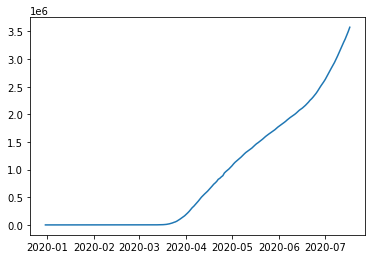

In [148]:
_= plt.figsize=(12,6)
_= plt.plot(data_us["Date"], data_us["c_cumul"])

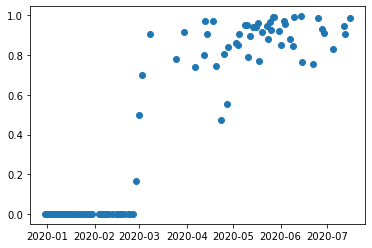

In [140]:
data_us2 = data_us[data_us["c_ratio"] < 1]
_= plt.figsize=(10,5)
_= plt.scatter(data_us2["Date"], data_us2["c_ratio"])

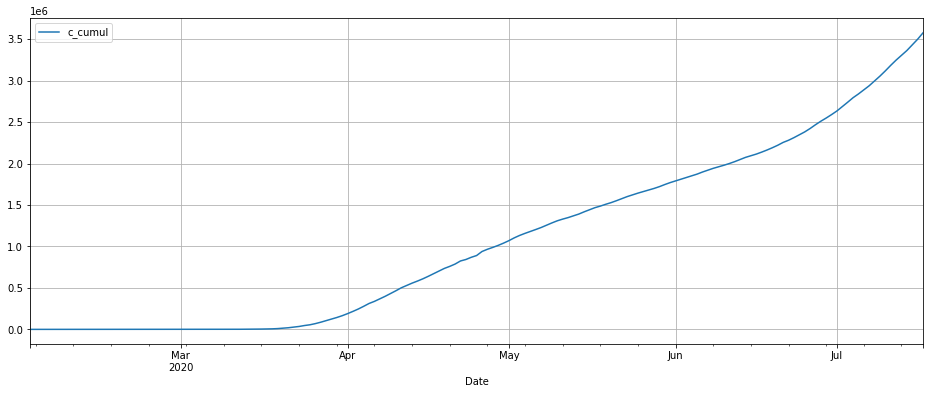

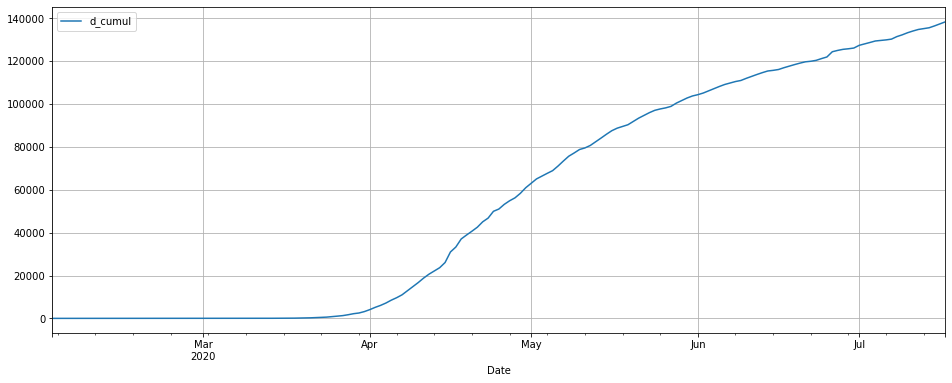

In [144]:
mask = data_us["Date"] > "2020-2-1"
_= data_us[mask].plot.line(x="Date", y="c_cumul", figsize=(16,6), grid=True)
_= data_us[mask].plot.line(x="Date", y="d_cumul", figsize=(16,6), grid=True)

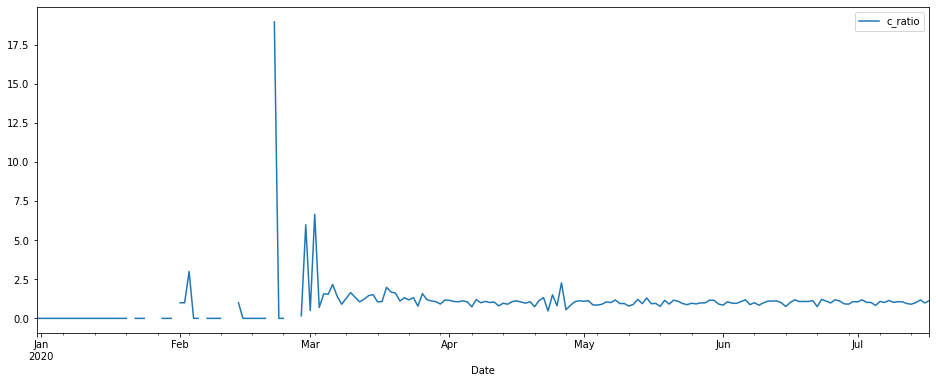

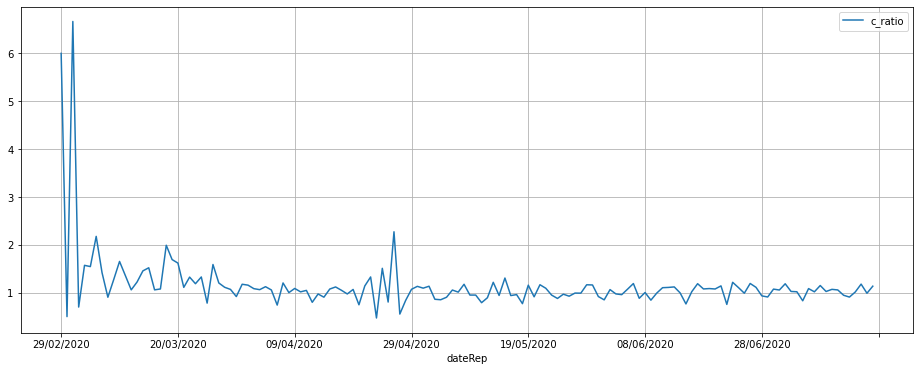

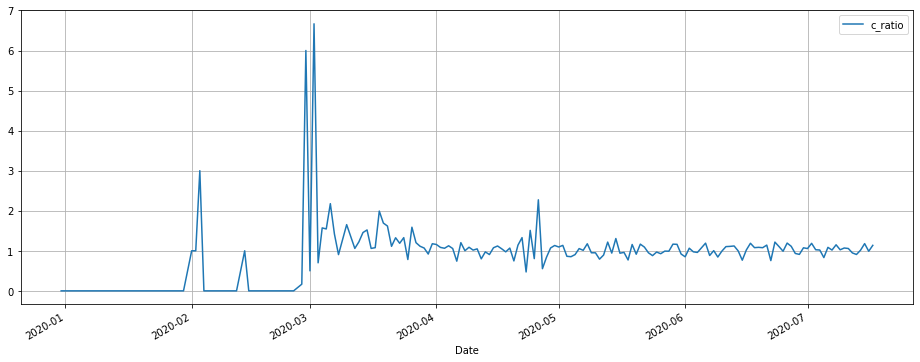

In [146]:
mask = data_us["Date"] >= "2020-02-29"
mask2 = data_us["c_ratio"] <= 7.5

_= data_us.plot.line(x="Date", y="c_ratio", figsize=(16,6))
_= data_us[mask].plot.line(x="dateRep", y="c_ratio", figsize=(16,6), grid=True)
_= data_us[mask2].plot.line(x="Date", y="c_ratio", figsize=(16,6), grid=True)



In [128]:
data_us.to_csv("covid19_US_data.csv")
data_us.to_excel("covid19_US_data.xlsx")